   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

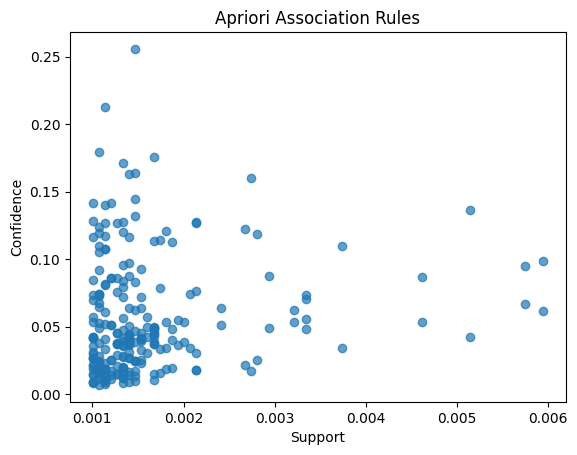

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
data = pd.read_csv('Ml Dataset/Apriori/Order1.csv')

# Fill missing values
data = data.fillna(data.mode().iloc[0])   # <-- you missed assigning it back to 'data'

# Convert transactions (each (member, date) = one basket)
transactions = []
for (member, date), basket in data.groupby(['Member_number', 'Date']):
    transactions.append(basket['itemDescription'].tolist())

# Encode transactions into True/False matrix
te = TransactionEncoder()
encode_transactions = te.fit_transform(transactions)

# Convert encoded data to DataFrame
df = pd.DataFrame(encode_transactions, columns=te.columns_)
print(df.head())   # <-- added parentheses to actually print rows

# Generate frequent itemsets
freq_itemset = apriori(df, min_support=0.001, use_colnames=True)
print("\nFrequent Itemsets:")
print(freq_itemset)

# Generate association rules
rules = association_rules(freq_itemset, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Optional visualization
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Apriori Association Rules')
plt.show()
